In [1]:
!pip install geopandas
!pip install rioxarray

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 41.3 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import xarray
import rioxarray
import warnings
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')
import numpy as npy

import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
# import rasterio
# import numpy as np
# from sklearn.linear_model import LinearRegression

# # Lista de nombres de archivos TIF para cada año
# archivos_tif = ['/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2013.tif', '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2014.tif',
#                 '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2015.tif', '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2016.tif',
#                 '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2017.tif', '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2018.tif',
#                 '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2019.tif', '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2020.tif',
#                 '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2021.tif', '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2022.tif', ]


# # Crea un arreglo de tiempo (variable x) para los 10 años
# tiempo = np.arange(1, 11).reshape(-1, 1)

# # Lista para almacenar las pendientes de la regresión lineal de cada píxel
# pendientes = []

# # Itera sobre cada píxel
# with rasterio.open(archivos_tif[0]) as src:
#     shape = (src.height, src.width)

# for i in range(shape[0]):
#     for j in range(shape[1]):
#         # Lista para almacenar los valores de NDVI-I válidos para cada año
#         valores_ndvi = []

#         # Lee los valores de NDVI-I para cada año en el píxel actual
#         for archivo in archivos_tif:
#             with rasterio.open(archivo) as src:
#                 valor_ndvi = src.read(1, window=((i, i+1), (j, j+1)))
#                 valores_ndvi.append(valor_ndvi[0, 0])

#         # Verifica y maneja los valores NaN en los valores de NDVI-I
#         valores_ndvi = np.array(valores_ndvi)
#         indices_validos = ~np.isnan(valores_ndvi)

#         if np.sum(indices_validos) > 1:
#             # Si hay al menos 2 valores válidos, realiza el análisis de regresión lineal
#             regresion = LinearRegression()
#             regresion.fit(tiempo[indices_validos], valores_ndvi[indices_validos].reshape(-1, 1))
#             pendientes.append(regresion.coef_[0][0])
#         else:
#             # Si no hay suficientes valores válidos, asigna NaN como la pendiente
#             pendientes.append(np.nan)

# # Las pendientes representan la tendencia temporal del NDVI-I para cada píxel
# pendientes = np.array(pendientes)

In [ ]:
import rasterio
import numpy as np
from sklearn.linear_model import LinearRegression

# Lista de nombres de archivos TIF para cada año
# archivos_tif = ['/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2013_4.tif','/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2019_4.tif',  '/content/drive/MyDrive/analisis geoespacial/Entregas/NDVI_2022_4.tif' ]
archivos_tif = ['/content/drive/MyDrive/Entregas/NDVI_2013_4.tif','/content/drive/MyDrive/Entregas/NDVI_2019_4.tif',  '/content/drive/MyDrive/Entregas/NDVI_2022_4.tif' ]


# Crea un arreglo de tiempo (variable x) para los 10 años
tiempo = np.arange(1, 4).reshape(-1, 1)

# Lista para almacenar las pendientes de la regresión lineal de cada píxel
pendientes = []

# Itera sobre cada píxel
with rasterio.open(archivos_tif[0]) as src:
    shape = (src.height, src.width)

for i in range(shape[0]):
    for j in range(shape[1]):
        # Lista para almacenar los valores de NDVI-I válidos para cada año
        valores_ndvi = []

        # Lee los valores de NDVI-I para cada año en el píxel actual
        for archivo in archivos_tif:
            with rasterio.open(archivo) as src:
                valor_ndvi = src.read(1, window=((i, i+1), (j, j+1)))
                valores_ndvi.append(valor_ndvi[0, 0])

        # Verifica y maneja los valores NaN en los valores de NDVI-I
        valores_ndvi = np.array(valores_ndvi)
        indices_validos = ~np.isnan(valores_ndvi)

        if np.sum(indices_validos) > 1:
            # Si hay al menos 2 valores válidos, realiza el análisis de regresión lineal
            regresion = LinearRegression()
            regresion.fit(tiempo[indices_validos], valores_ndvi[indices_validos].reshape(-1, 1))
            pendientes.append(regresion.coef_[0][0])
        else:
            # Si no hay suficientes valores válidos, asigna NaN como la pendiente
            pendientes.append(np.nan)

# Las pendientes representan la tendencia temporal del NDVI-I para cada píxel
pendientes = np.array(pendientes)
pendientes

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
# pendientes = pendientes[~np.isnan(pendientes)]
# pendientes_2d = pendientes.reshape(1, 2986)

In [ ]:
pendientes = np.array(pendientes)[:2940]

In [ ]:
np.shape(pendientes)

(7680,)

In [ ]:
7680/120

64.0

In [ ]:
# Reshape pendientes para convertirla en una matriz bidimensional
pendientes_matriz = pendientes.reshape(120,64)

# pendientes_matriz ahora es una matriz bidimensional que representa las pendientes de la regresión lineal para cada píxel
pendientes_matriz

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

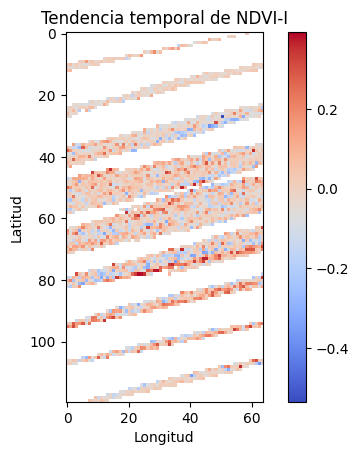

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Crea una figura y un objeto de ejes
fig, ax = plt.subplots()

# Crea el mapa de colores
cmap = plt.cm.get_cmap('coolwarm')  # Elige el mapa de colores que prefieras

# Grafica los datos en forma de mapa
im = ax.imshow(pendientes_matriz, cmap=cmap)

# Agrega una barra de colores (leyenda)
cbar = fig.colorbar(im, ax=ax)

# Personaliza los ejes y el título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Tendencia temporal de NDVI-I')

# Muestra la figura
plt.show()

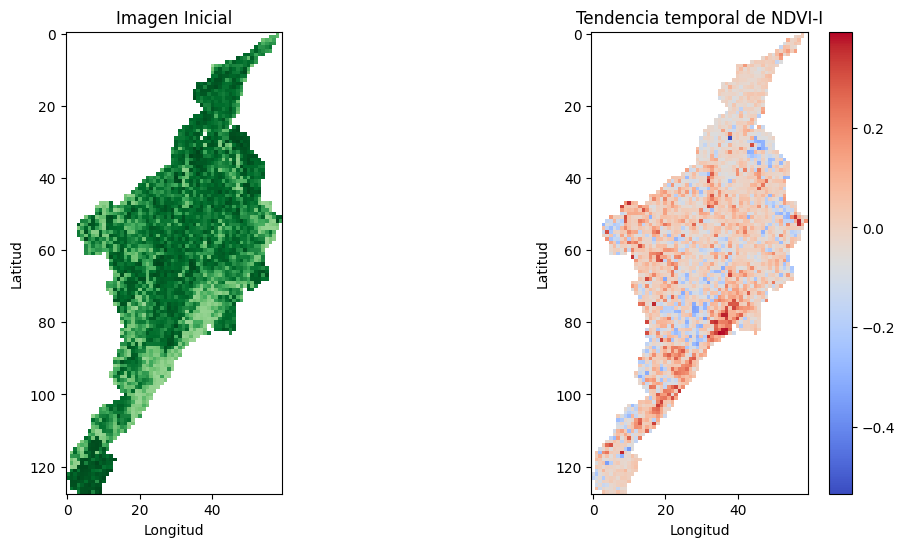

In [ ]:
import rasterio
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Lista de nombres de archivos TIF para cada año
archivos_tif = ['/content/drive/MyDrive/Entregas/NDVI_2013_4.tif','/content/drive/MyDrive/Entregas/NDVI_2019_4.tif',  '/content/drive/MyDrive/Entregas/NDVI_2022_4.tif']

# Lee las dimensiones de la imagen raster original utilizando el primer archivo TIF
with rasterio.open(archivos_tif[0]) as src:
    shape = (src.height, src.width)

# Crea un arreglo de tiempo (variable x) para los años
tiempo = np.arange(1, len(archivos_tif) + 1).reshape(-1, 1)

# Lista para almacenar las pendientes de la regresión lineal de cada píxel
pendientes = np.zeros(shape)

# Itera sobre cada píxel
for i in range(shape[0]):
    for j in range(shape[1]):
        # Lista para almacenar los valores de NDVI-I válidos para cada año
        valores_ndvi = []

        # Lee los valores de NDVI-I para cada año en el píxel actual
        for archivo in archivos_tif:
            with rasterio.open(archivo) as src:
                valor_ndvi = src.read(1, window=((i, i+1), (j, j+1)))
                valores_ndvi.append(valor_ndvi[0, 0])

        # Verifica y maneja los valores NaN en los valores de NDVI-I
        valores_ndvi = np.array(valores_ndvi)
        indices_validos = ~np.isnan(valores_ndvi)

        if np.sum(indices_validos) > 1:
            # Si hay al menos 2 valores válidos, realiza el análisis de regresión lineal
            regresion = LinearRegression()
            regresion.fit(tiempo[indices_validos], valores_ndvi[indices_validos].reshape(-1, 1))
            pendientes[i, j] = regresion.coef_[0][0]
        else:
            # Si no hay suficientes valores válidos, asigna NaN como la pendiente
            pendientes[i, j] = np.nan


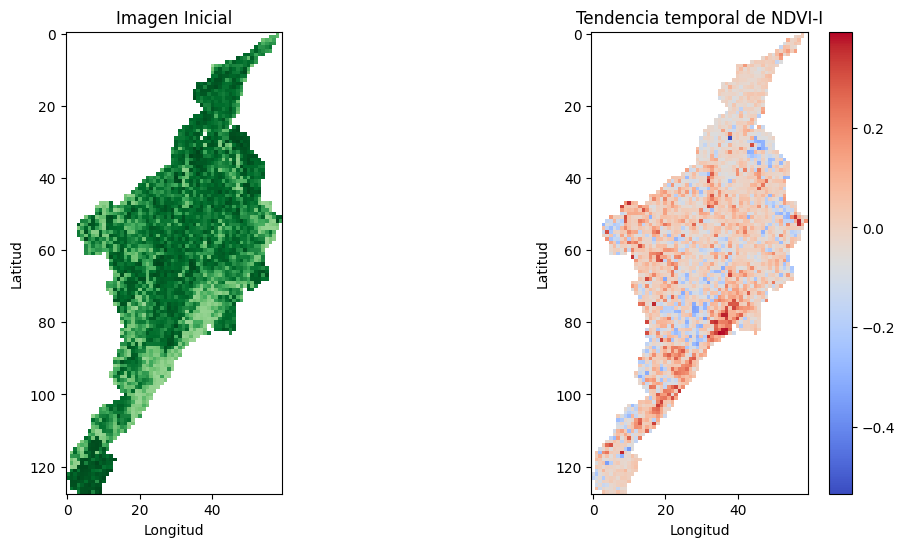

In [ ]:
# Carga la imagen inicial para mostrarla junto con las pendientes
with rasterio.open(archivos_tif[0]) as src:
    imagen_inicial = src.read(1)

# Crea una figura y un objeto de ejes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# # Grafica la imagen inicial
ax1.imshow(imagen_inicial, cmap='Greens')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Imagen Inicial')

# Grafica los datos de las pendientes
cmap = plt.cm.get_cmap('coolwarm')
im = ax2.imshow(pendientes, cmap=cmap)
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')
ax2.set_title('Tendencia temporal de NDVI-I')

# Agrega una barra de colores (leyenda) para las pendientes
cbar = fig.colorbar(im, ax=ax2)

# Ajusta el espacio entre las subfig

In [ ]:
import rasterio
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# Lista de nombres de archivos TIF para cada año
archivos_tif = ['/content/drive/MyDrive/Entregas/NDVI_2013_4.tif','/content/drive/MyDrive/Entregas/NDVI_2019_4.tif',  '/content/drive/MyDrive/Entregas/NDVI_2022_4.tif']

# Lee las dimensiones de la imagen raster original utilizando el primer archivo TIF
with rasterio.open(archivos_tif[0]) as src:
    shape = (src.height, src.width)

# Crea un arreglo de tiempo (variable x) para los años
tiempo = np.arange(1, len(archivos_tif) + 1).reshape(-1, 1)

# Lista para almacenar las pendientes de la regresión lineal de cada píxel
pendientes = np.zeros(shape)

# Lista para almacenar la correlación de Pearson de cada píxel
correlaciones = np.zeros(shape)

# Itera sobre cada píxel
for i in range(shape[0]):
    for j in range(shape[1]):
        # Lista para almacenar los valores de NDVI-I válidos para cada año
        valores_ndvi = []

        # Lee los valores de NDVI-I para cada año en el píxel actual
        for archivo in archivos_tif:
            with rasterio.open(archivo) as src:
                valor_ndvi = src.read(1, window=((i, i+1), (j, j+1)))
                valores_ndvi.append(valor_ndvi[0, 0])

        # Verifica y maneja los valores NaN en los valores de NDVI-I
        valores_ndvi = np.array(valores_ndvi)
        indices_validos = ~np.isnan(valores_ndvi)

        if np.sum(indices_validos) > 1:
            # Si hay al menos 2 valores válidos, realiza el análisis de regresión lineal
            regresion = LinearRegression()
            regresion.fit(tiempo[indices_validos], valores_ndvi[indices_validos].reshape(-1, 1))
            pendientes[i, j] = regresion.coef_[0][0]
            correlaciones[i, j] = pearsonr(tiempo[indices_validos].flatten(), valores_ndvi[indices_validos].flatten())[0]
        else:
            # Si no hay suficientes valores válidos, asigna NaN como la pendiente y la correlación
            pendientes[i, j] = np.nan
            correlaciones[i, j] = np.nan



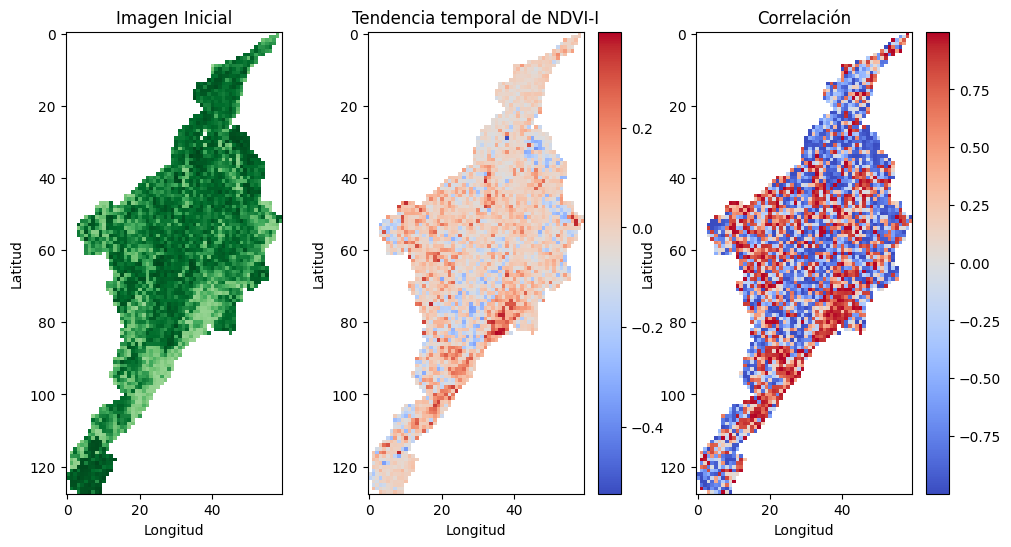

In [ ]:
# Carga la imagen inicial para mostrarla junto con las pendientes
with rasterio.open(archivos_tif[0]) as src:
    imagen_inicial = src.read(1)

# Crea una figura y un objeto de ejes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))

# # Grafica la imagen inicial
ax1.imshow(imagen_inicial, cmap='Greens')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Imagen Inicial')

# Grafica los datos de las pendientes
cmap = plt.cm.get_cmap('coolwarm')
im = ax2.imshow(pendientes, cmap=cmap)
ax2.set_xlabel('Longitud')
ax2.set_ylabel('Latitud')
ax2.set_title('Tendencia temporal de NDVI-I')

# Grafica los datos de las correlaciones
cmap = plt.cm.get_cmap('coolwarm')
im3 = ax3.imshow(correlaciones, cmap=cmap)
ax3.set_xlabel('Longitud')
ax3.set_ylabel('Latitud')
ax3.set_title('Correlación')

# Agrega una barra de colores (leyenda) para las pendientes
cbar = fig.colorbar(im, ax=ax2)
cbar_3 = fig.colorbar(im3, ax=ax3)

# Ajusta el espacio entre las subfig

In [ ]:
import matplotlib.pyplot as plt

# Lista de nombres de archivos TIF para cada año
archivos_tif = ['/content/drive/MyDrive/Entregas/NDVI_2013_4.tif','/content/drive/MyDrive/Entregas/NDVI_2019_4.tif',  '/content/drive/MyDrive/Entregas/NDVI_2022_4.tif']

# Lee la imagen inicial para mostrarla junto con las pendientes y correlaciones
imagen_inicial = plt.imread(archivos_tif[0])

# Crea una figura y un objeto de ejes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

# Grafica la imagen inicial
ax1.imshow(imagen_inicial, cmap='Greens')
ax1.set_xlabel('Longitud')
ax1.set_ylabel('Latitud')
ax1.set_title('Imagen Inicial')

# Muestra la figura
plt.show()


UnidentifiedImageError: ignored